# KGS O&G Well Data Exploration
This notebook explores some of the oil and gas well data that is publically available from the Kansas Geologic Survey: http://www.kgs.ku.edu/PRS/petroDB.html

In [2]:
import pandas as pd

## Kansas Wells
The KGS maintains a database of all oil & gas wells in the state including all active, plugged and abondoned wells.

|Field|Description|
|---|---|
|KID|	Unique ID assigned by the Survey. Not necessarily permanent.|
|API_NUMBER|	API number assigned by the Kansas Corp. Commission, or from historical records.|
|API_NUM_NODASH|	API number, formatted with no dashes.|
|LEASE|	Lease name.|
|WELL|	Well number.|
|FIELD|	Oil and gas field name|
|LATITUDE|	NAD 1927, generated from the legal location.|
|LONGITUDE|	Some new wells have GPS longitude and latitude.|
|LONG_LAT_SOURCE|	May be calculated from footages, quarter calls, or from GPS.|
|TOWNSHIP|	Public Land Survey System township number, 1-35 in Kansas.|
|TWN_DIR|	Township direction. S (south) or N (north), Always south in Kansas|
|RANGE|	Public Land Survey System range number, 1-43 in west and 1-25 in east.|
|RANGE_DIR|	Range direction. E (east) or W (west).|
|SECTION|	The PLSS section the site is located in: 1-36|
|SPOT|	The legal quarter description qualifiers list as NE, NW, SE, and SW, etc..|
|FEET_NORTH|	Distance in feet north from the reference location, negative is to south.|
|FEET_EAST|	Distance in feet east from the reference location, negative is to west.|
|FOOT_REF|	Corner from which the footages is measured.|
|ORIG_OPERATOR|	Operator of the well at drilling completion. Not usually updated except at workover.|
|CURR_OPERATOR|	Updated operator name; may be newer than original operator but not guaranteed to be the current operator.|
|ELEVATION|	The elevation the well, in feet.|
|ELEV_REF|	KB is Kelly bushing, DF is derrick floor, GL is ground level, TOPO is estimate based on digital model.|
|DEPTH|	Total depth of well, not plugged back.|
|PRODUCE_FORM|	Producing formation typed in from completion form or from lease production data.|
|IP_OIL|	Initial production of oil, barrels.|
|IP_GAS|	Initial production of gas, MCF.|
|IP_WATER|	Initial production of water, barrels.|
|PERMIT|	Permit date.|
|SPUD|	Date of drilling start.|
|COMPLETION|	Date of drilling finish.|
|PLUGGING|	Date well plugged.|
|MODIFIED|	Date this well record was last altered.|
|OIL_KID|	Kansas Geological Survey ID code of the oil production data, in our Lease database.|
|OIL_DOR_ID|	Kansas Dept. of Revenue ID code of the oil production data, in our Lease database.|
|GAS_KID|	Kansas Geological Survey ID code of the gas production data, in our Lease database.|
|GAS_DOR_ID|	Kansas Dept. of Revenue ID code of the gas production data, in our Lease database.|
|KCC_PERMIT|	KCC Permit Number associated with this well.|
|STATUS|	Well status--type of well. Abbreviation list|
|STATUS2|	Additional status info from KCC.|
|COMMENTS|	Information to enhance well data or explain problems.|

In [3]:
df = pd.read_csv("../../../casestudy_data/group_2/ks_wells.txt")
df.shape

(490591, 41)

#### Unique Well Identifiers -- `'KID'`, `'API_NUMBER'`, and `'API_NUM_NODASH'`
Each O&G well in the US has a unique id called the [API Number](https://en.wikipedia.org/wiki/API_well_number) (American Petroleum Institute). Kansas additionally has their own "Kansas ID" (KID). These values uniquely identify a well and can be used to join multiple data sources together.

In [7]:
df[['KID', 'API_NUMBER', 'API_NUM_NODASH']].head()

,KID,API_NUMBER,API_NUM_NODASH
0,1001184201,15-007-20008,1.500720e+13
1,1001184206,15-007-20013,1.500720e+13
2,1001184249,15-007-20056,1.500720e+13
3,1001184287,15-007-20094,1.500720e+13
4,1001184375,15-007-20184,1.500720e+13


In [8]:
df[['KID', 'API_NUMBER', 'API_NUM_NODASH']].isna().sum()

KID                   0
API_NUMBER        18974
API_NUM_NODASH    18979
dtype: int64

In [10]:
# So not every record actually has a API number here. What kind of wells are these?
# We probably don't need API_NUM_NODASH. Let's drop to slim down the dataset some
df = df.drop(columns='API_NUM_NODASH')

#### Well Name --  `'LEASE'`, `'WELL'`, and `'ORIG_OPERATOR'`/ `'CURR_OPERATOR'`
Besides the number unique well identifier, O&G wells are commonly identified with the combination of the lease name, well name, and operator. It's not uncommon for wells to change hands between operators throughout their lifecycle. 

In [108]:
df[['LEASE', 'WELL', 'ORIG_OPERATOR', 'CURR_OPERATOR']].head()

,LEASE,WELL,ORIG_OPERATOR,CURR_OPERATOR
0,Kirkbride 'B',1,"Petroleum, Inc.",unavailable
1,SLEEPER,1-W,SHENANDOAH OIL CORP,unavailable
2,"Winters, W.W.",1,Midwest Oil Corp.,unavailable
3,Stonestreet,1,Tilco and others,unavailable
4,Lenkner,1,"Raymond Oil Co., Inc.","Raymond Oil Company, Inc."


In [11]:
df[['LEASE', 'WELL', 'ORIG_OPERATOR', 'CURR_OPERATOR']].isna().sum()

LEASE             2819
WELL              3991
ORIG_OPERATOR    42117
CURR_OPERATOR        0
dtype: int64

In [70]:
# It's not uncommon for wells to change hands between operators throughtout their lifecycle
df[(df['ORIG_OPERATOR'] != df['CURR_OPERATOR']) & (df['CURR_OPERATOR'] != 'unavailable')][['KID', 'ORIG_OPERATOR', 'CURR_OPERATOR']]

,KID,ORIG_OPERATOR,CURR_OPERATOR
4,1001184375,"Raymond Oil Co., Inc.","Raymond Oil Company, Inc."
16,1001184647,"ROBINSON OIL CO. & SWEETMAN DRILLING, INC.",Younger Energy Company
23,1001184982,Beren Corp.,Beren Corporation
25,1001185010,Edmiston Oil Co.,"Edmiston Oil Company, Inc."
26,1001185014,"Oxy USA, Inc.","Chesapeake Operating, LLC"
...,...,...,...
490563,1046936233,BRADEN OIL CO.,"Braden-Deem, Inc."
490577,1046936247,S & B Operating LLC,"Petrodome Operating, LLC"
490578,1046936248,S & B Operating LLC,"Petrodome Operating, LLC"
490579,1046936249,S & B Operating LLC,"Petrodome Operating, LLC"


In [71]:
df['ORIG_OPERATOR'].value_counts(dropna=False)

NaN                        42117
CITIES SERVICE CO           4873
Oxy USA, Inc.               2511
Quest Cherokee, LLC         2392
Amoco Production Co.        1740
                           ...  
H & P Oil Co.                  1
C & G DRILLING CO. INC.        1
SUTTON & GLICKMAN              1
STEVE N. HERYNK                1
JOHNSON BROS. INC              1
Name: ORIG_OPERATOR, Length: 69588, dtype: int64

In [72]:
df['CURR_OPERATOR'].value_counts(dropna=False)

unavailable                      244448
Scout Energy Management LLC        6530
Merit Energy Company, LLC          4286
Colt Energy Inc                    3907
RJ Energy, LLC                     3747
                                  ...  
Westburne Exploration, Inc.           1
Weilert, Lawrence J                   1
Perrin Oil Co.                        1
Wimsett Pulling & Service Co.         1
ENERSTAR RESOURCES O&G, LLC           1
Name: CURR_OPERATOR, Length: 7172, dtype: int64

In [73]:
# Definitly looks like there is shift who the most common operators are

#### Well Location
There are several attributes used to denote the well's location:
* `'FIELD'` - Fields are named by the Kansas Geological Society's Nomenclature Committee, currently headed by John Morrison of the Independent Oil and Gas Service, Wichita.
* `'LATITUDE'`, `'LONGITUDE'`, `'LONG_LAT_SOURCE'` -- Coordinate location of well head in decimal degrees, NAD27 datum
* `'ELEVATION'` -- The elevation associated with the well measured in positive FEET from sea level 
* `'ELEV_REF'` -- The point where elevation is measured from 
    * "KB" --> Kelly Bushing 
    * "TOPO" --> Topographic 
    * "GL" --> Ground Level
    * "DF" --> Drilling Floor 
![Diagram of elev on rig](https://doc.opendtect.org/6.0.0/doc/od_userdoc/content/resources/images/survey/defs_ref_data.jpg)

In [74]:
df[['FIELD', 'LATITUDE', 'LONGITUDE', 'LONG_LAT_SOURCE', 'ELEVATION', 'ELEV_REF']].head()

,FIELD,LATITUDE,LONGITUDE,LONG_LAT_SOURCE,ELEVATION,ELEV_REF
0,MEDICINE LODGE NORTH,37.237812,-98.634131,Calc. from footages,1535.0,KB
1,UNNAMED,37.408992,-98.475495,Calc. from footages,1773.0,TOPO
2,Aetna Gas Area,37.052861,-98.977851,Calc. from footages,1608.0,KB
3,WILDCAT,37.313259,-98.710457,Calc. from footages,1539.0,KB
4,LUKENS,37.230362,-98.520233,Calc. from footages,1494.0,KB


In [75]:
df['FIELD'].value_counts(dropna=False).to_frame().head(20)

,FIELD
NaN,146000
UNKNOWN,51958
WILDCAT,36163
HUGOTON GAS AREA,9167
PAOLA-RANTOUL,6459
CHEROKEE BASIN COAL AREA,4926
TRAPP,4132
UNNAMED,3937
CHASE-SILICA,3790
HUMBOLDT-CHANUTE,3149


In [76]:
# The majority of coordinate locations were not collected by GPS but rather 
# calculated them from PLSS location (see below)
df['LONG_LAT_SOURCE'].value_counts(dropna=False)

Calc. from footages         315967
Calc. from quarter calls     87942
From GPS                     67101
Center of section            19533
Source unknown                  48
Name: LONG_LAT_SOURCE, dtype: int64

In [77]:
df['ELEV_REF'].value_counts(dropna=False) # See diagram above for depiction of KB vs GL vs DF elevation reference

 KB      199036
 TOPO    172735
 GL       91813
 DF       26722
NaN         285
Name: ELEV_REF, dtype: int64

##### PLSS Location 
Well locations have historically (and still common today) been determined by professional land survey methods and reported with footages in the Public Land Survey System format of Township/Range/Section/Spot. Since the KGS has already calculated lat/lon for all wells, we probably won't need to rely on these attributes: 
* `'TOWNSHIP'`
* `'TWN_DIR'`
* `'RANGE'`
* `'RANGE_DIR'`
* `'SECTION'`
* `'SPOT'`
* `'FEET_NORTH'`
* `'FEET_EAST'`
* `'FOOT_REF'`

In [78]:
df[['TOWNSHIP', 'TWN_DIR', 'RANGE', 'RANGE_DIR', 'SECTION', 'SPOT',
    'FEET_NORTH', 'FEET_EAST', 'FOOT_REF']].head()

KeyError: "None of [Index(['TOWNSHIP', 'TWN_DIR', 'RANGE', 'RANGE_DIR', 'SECTION', 'SPOT',\n       'FEET_NORTH', 'FEET_EAST', 'FOOT_REF'],\n      dtype='object')] are in the [columns]"

In [13]:
# Let's assume the KGS properly converted these to lat/lon and drop the PLSS location info 
df = df.drop(columns =['TOWNSHIP', 'TWN_DIR', 'RANGE', 'RANGE_DIR', 'SECTION', 'SPOT',
    'FEET_NORTH', 'FEET_EAST', 'FOOT_REF'] )

#### Depth and Formation at Depth (`'DEPTH'`, `'FORM_AT_DEPTH'`)
The total MEASURED DEPTH of the well and the stratigraphic formation at that max depth


In [79]:
df[['DEPTH', 'FORM_AT_DEPTH']].tail()

,DEPTH,FORM_AT_DEPTH
490586,3613.0,NaN
490587,930.0,NaN
490588,410.0,NaN
490589,922.0,NaN
490590,530.0,NaN


In [80]:
df['DEPTH'].describe() # This is measured depth in positive feet from the elevation reference 

count    424062.000000
mean       2670.360874
std        1585.650366
min        -955.000000
25%         980.000000
50%        2978.000000
75%        3800.000000
max       11300.000000
Name: DEPTH, dtype: float64

In [81]:
df['FORM_AT_DEPTH'].value_counts(dropna=False)

NaN                      267432
MISSISSIPPIAN             57113
ARBUCKLE GROUP            38267
ARBUCKLE                  16157
PENNSYLVANIAN SYSTEM      12861
                          ...  
COUNCIL GROVE, MORROW         1
MORROW SAND                   1
xDOLOMITE                     1
WHITE                         1
UNCONFORMITY                  1
Name: FORM_AT_DEPTH, Length: 669, dtype: int64

**Learn more about the stratigraphic succession in Kansas here: http://www.kgs.ku.edu/Publications/Bulletins/189/index.html**

[![Kansas Stratigraphy](http://www.kgs.ku.edu/Publications/Bulletins/189/gifs/strat_chart.jpg "Kansas Strat")](http://www.kgs.ku.edu/Publications/Bulletins/189/gifs/strat_chart.jpg "Kansas Strat")

### Initial Production Data
For all producing wells, the producing formation (`'PRODUCE_FORM'`) and initial production (IP) of oil (barrels), gas (MCF) and water (barrels)

In [82]:
df['PRODUCE_FORM'].value_counts(dropna=False)

NaN                                 389032
Chase Group                           9006
SQUIRREL                              8864
BARTLESVILLE                          7154
ARBUCKLE                              6930
                                     ...  
Lansing-Kansas City and Altamont         1
CALHOUN                                  1
PLATTSMOUTH                              1
Arbuckle-Dolomite                        1
JHNSMC                                   1
Name: PRODUCE_FORM, Length: 2588, dtype: int64

In [83]:
df[['IP_OIL', 'IP_GAS', 'IP_WATER']].describe()

,IP_OIL,IP_GAS,IP_WATER
count,38993.000000,1.674200e+04,24114.000000
mean,343.436092,4.405069e+04,68.726889
std,2509.983655,3.869936e+06,260.411345
min,0.000000,0.000000e+00,0.000000
25%,11.000000,1.212500e+00,2.000000
50%,40.000000,5.000000e+01,20.000000
75%,126.000000,3.000000e+02,67.000000
max,177000.000000,4.970000e+08,20571.000000


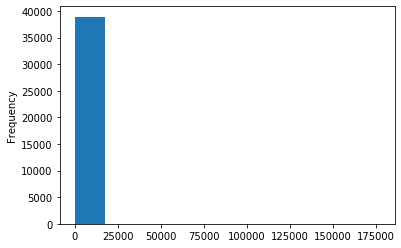

In [84]:
df['IP_OIL'].plot.hist()

### Associated Dates (PERMIT, SPUD COMPLETION, PLUGGING, MODIFIED)

In [85]:
df[['PERMIT', 'SPUD', 'COMPLETION', 'PLUGGING', 'MODIFIED']].describe()

,PERMIT,SPUD,COMPLETION,PLUGGING,MODIFIED
count,199116,303221,317735,264586,489831
unique,16838,34485,34869,29321,6577
top,30-JUN-1980,01-JAN-1956,01-OCT-1981,01-MAR-1964,26-AUG-1997
freq,274,120,221,267,29514


In [86]:
df['PERMIT'] = pd.to_datetime(df['PERMIT'], format="%d-%b-%Y", errors='coerce')
df['SPUD'] = pd.to_datetime(df['SPUD'], format="%d-%b-%Y", errors='coerce')
df['COMPLETION'] = pd.to_datetime(df['COMPLETION'], format="%d-%b-%Y", errors='coerce')
df['PLUGGING'] = pd.to_datetime(df['PLUGGING'], format="%d-%b-%Y", errors='coerce')
df['MODIFIED'] = pd.to_datetime(df['MODIFIED'], format="%d-%b-%Y", errors='coerce')

In [87]:
df[['PERMIT', 'SPUD', 'COMPLETION', 'PLUGGING', 'MODIFIED']].describe()

,PERMIT,SPUD,COMPLETION,PLUGGING,MODIFIED
count,199115,303218,317732,264583,489831
unique,16837,34482,34866,29318,6577
top,1980-06-30 00:00:00,1956-01-01 00:00:00,1981-10-01 00:00:00,1964-03-01 00:00:00,1997-08-26 00:00:00
freq,274,120,221,267,29514
first,1856-09-07 00:00:00,1852-09-06 00:00:00,1847-04-08 00:00:00,1900-09-29 00:00:00,1996-04-22 00:00:00
last,2021-05-21 00:00:00,2029-05-11 00:00:00,2021-05-13 00:00:00,2021-05-20 00:00:00,2021-05-23 00:00:00


In [88]:
df['lifespan'] = df['PLUGGING'] - df['COMPLETION']

In [89]:
df['lifespan'].describe()

count                       185053
mean     2963 days 18:13:49.786061
std      4996 days 13:45:09.793150
min          -28134 days +00:00:00
25%                0 days 00:00:00
50%               30 days 00:00:00
75%             4291 days 00:00:00
max            50653 days 00:00:00
Name: lifespan, dtype: object

In [90]:
df['drilling_days'] = (df['COMPLETION'] - df['SPUD'])

In [91]:
df['drilling_days'].describe()

count                      296451
mean      47 days 22:53:35.325298
std      557 days 17:55:30.294876
min         -36523 days +00:00:00
25%               8 days 00:00:00
50%              16 days 00:00:00
75%              41 days 00:00:00
max           36566 days 00:00:00
Name: drilling_days, dtype: object

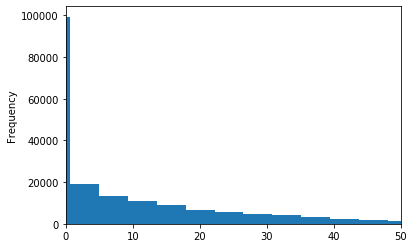

In [92]:
((df['lifespan'].dt.days)/365).dropna().plot.hist(bins=50, xlim=(0,50))

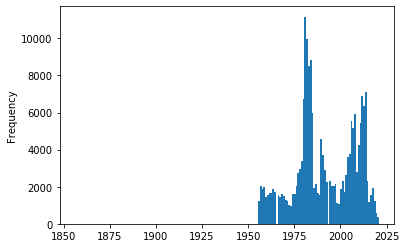

In [93]:
df['PERMIT'].dt.year.plot.hist(bins=2021-1850)

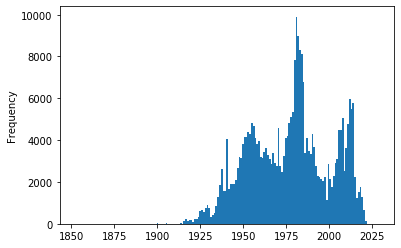

In [94]:
df['SPUD'].dt.year.plot.hist(bins=2021-1850)

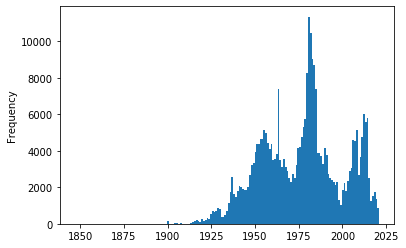

In [95]:
df['COMPLETION'].dt.year.plot.hist(bins=2021-1850)

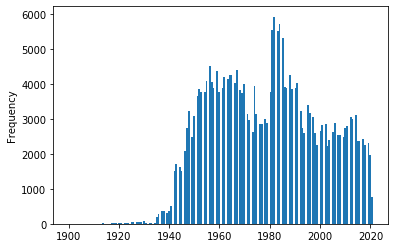

In [96]:
df['PLUGGING'].dt.year.plot.hist(bins=2021-1850)

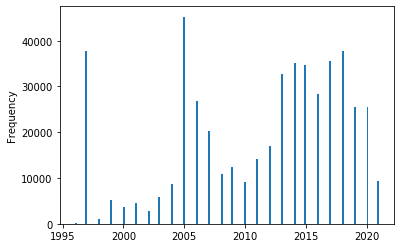

In [97]:
df['MODIFIED'].dt.year.plot.hist(bins=2021-1850)

### Well Status
|Abbreviation|	Meaning	|
|-----------|---------|
|ABND|	Abandoned loc, never drilled, or D&A|		
|CATH|	Cathodic protection well|
|CBM|	Coal bed methane	|
|CLASS1|	Class 1 Injection Well|
|CLASS ONE (OLD)|	Class 1 Injection Well|		
|CO2-INJ|	Carbon dioxide injection|
|D&A|	Dry & abandoned		|
|EOR|	Enhanced oil recovery|
|EXP|	Expired permit	|	
|GAS|	Gas well|
|GSW|	Gas Storage Well|		
|HELIUM	|Helium|
|INJ|	Injection well	|	
|J&A|	Junked and abandoned|
|LH	|Lost hole	|	
|LOC|	Location, status unknown;or location never drilled|
|NHDW|	Non-Hazardous Disposal Well	|	
|O&G|	Oil and gas|
|OBS|	observation		|
|OIL|	Oil well|
|ON LIST|	Under KCC review|		
|P&A	|Plugged and abandoned|
|SHUT-IN|	Shut-in	|	
|STRAT	|Stratigraphic test|
|SWD|	Saltwater disposal	|	
|TA|	Temporarily abandoned (but not P&A or D&A)|
|W-INJ	|Water injection		|
|WATER	|Water well|

In [138]:
df['STATUS'].value_counts(dropna=False).to_frame().head(50)

,STATUS
D&A,119469
OIL-P&A,105402
OIL,102276
OTHER(),26468
GAS,25674
LOC,21426
EOR,19640
GAS-P&A,14747
EOR-P&A,11975
SWD,8026


In [139]:
df['STATUS2'].value_counts(dropna=False).to_frame().head(50)

,STATUS2
Plugged and Abandoned,230409
Producing,73522
Approved Intent to Drill,38040
NaN,36246
Expired Intent to Drill (C-1),18259
Inactive Well,17815
Authorized Injection Well,15641
Recompleted,12189
KCC Fee Fund Plugging,11572
Converted to EOR Well,8608


In [20]:
# We need to add a County column 
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONGITUDE'],df['LATITUDE']), crs='EPSG:4267')

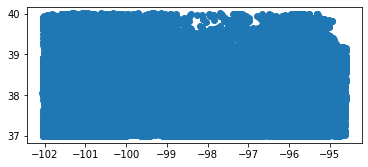

In [19]:
gdf.plot()

In [22]:
# Let's get KS counties
counties = gpd.read_file('../../../casestudy_data/group_2/gis/tl_2014_ks_county.shp')
counties.crs

{'init': 'epsg:4269'}

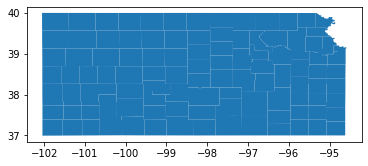

In [23]:
# Reproject to same as wells dataset
counties = counties.to_crs('EPSG:4267')
counties.plot()

In [24]:
counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,20,073,00485003,20073,Greenwood,Greenwood County,06,H1,G4020,None,None,None,A,2961132985,24155654,+37.8793471,-096.2417321,"POLYGON ((-96.35782 38.08580, -96.35781 38.086..."
1,20,043,00484991,20043,Doniphan,Doniphan County,06,H1,G4020,312,41140,None,A,1018914855,12615010,+39.7885021,-095.1472253,"POLYGON ((-95.33957 39.82762, -95.33960 39.835..."
2,20,157,00485042,20157,Republic,Republic County,06,H1,G4020,None,None,None,A,1857983286,7966990,+39.8289103,-097.6509213,"POLYGON ((-97.93310 39.82743, -97.93310 39.827..."
3,20,039,00484989,20039,Decatur,Decatur County,06,H1,G4020,None,None,None,A,2314199309,1631670,+39.7835420,-100.4597084,"POLYGON ((-100.74001 39.82856, -100.74003 39.8..."
4,20,147,00485037,20147,Phillips,Phillips County,06,H1,G4020,None,None,None,A,2294398019,22493382,+39.7845058,-099.3421498,"POLYGON ((-99.62673 39.82841, -99.62671 39.828..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,20,155,00485041,20155,Reno,Reno County,06,H1,G4020,None,26740,None,A,3251332272,43417474,+37.9481849,-098.0783463,"POLYGON ((-97.92181 38.17370, -97.92164 38.173..."
101,20,069,00485001,20069,Gray,Gray County,06,H1,G4020,None,None,None,A,2250356165,1113338,+37.7445134,-100.4517163,"POLYGON ((-100.66452 37.86807, -100.66451 37.8..."
102,20,197,00485059,20197,Wabaunsee,Wabaunsee County,06,H1,G4020,None,45820,None,A,2057225030,13781529,+38.9551537,-096.2012619,"POLYGON ((-96.39052 39.04326, -96.39052 39.043..."
103,20,173,00485049,20173,Sedgwick,Sedgwick County,06,H1,G4020,556,48620,None,A,2583567131,30043947,+37.6810450,-097.4610535,"POLYGON ((-97.69837 37.73504, -97.69838 37.735..."


In [49]:
counties = gpd.read_file('../../../casestudy_data/group_2/gis/tl_2014_ks_county.shp')
counties = counties.to_crs('EPSG:4267')

def which_county(point):
    # Takes point and returns county in KS where point exists
    for index, county in counties.iterrows():
        poly = county.geometry
        if poly.contains(point):
            return county['NAME']
        else: pass 

In [38]:
%%time
which_county(df.iloc[1]['geometry'], counties)

CPU times: user 7.25 ms, sys: 2.07 ms, total: 9.32 ms
Wall time: 8.19 ms


'Barber'

In [54]:
# Test subset of 1000 records
test_df = df.tail(1000)
test_df

,KID,API_NUMBER,LEASE,WELL,FIELD,LATITUDE,LONGITUDE,LONG_LAT_SOURCE,ORIG_OPERATOR,CURR_OPERATOR,...,MODIFIED,OIL_KID,OIL_DOR_ID,GAS_KID,GAS_DOR_ID,KCC_PERMIT,STATUS,STATUS2,COMMENTS,geometry
489591,1046209628,15-145-00155-0001,J. EVERS,1,NaN,38.173689,-99.027420,Calc. from footages,STANOLIND OIL & GAS COMPANY,unavailable,...,24-JAN-2017,NaN,NaN,NaN,NaN,NaN,GAS,Recompleted,NaN,POINT (-99.02742 38.17369)
489592,1046209629,15-145-00155-0002,J. EVERS,1,NaN,38.173689,-99.027420,Calc. from footages,STANOLIND OIL & GAS COMPANY,unavailable,...,24-JAN-2017,NaN,NaN,NaN,NaN,NaN,GAS-P&A,Plugged and Abandoned,NaN,POINT (-99.02742 38.17369)
489593,1046209630,15-145-00371-0001,YEAGER,1,NaN,38.115432,-99.041063,Calc. from footages,HALLIBURTON OIL PRODUCING COMPANY,unavailable,...,24-JAN-2017,NaN,NaN,NaN,NaN,NaN,D&A,Plugged and Abandoned,NaN,POINT (-99.04106 38.11543)
489594,1046209631,15-145-19021,MALIN,2,NaN,38.173689,-99.038795,Calc. from quarter calls,IRON DRILLING COMPANY,unavailable,...,24-JAN-2017,NaN,NaN,NaN,NaN,NaN,OIL-P&A,Plugged and Abandoned,NaN,POINT (-99.03879 38.17369)
489595,1046209632,15-163-22312-0001,BENOIT,2,NaN,39.480232,-99.573482,From GPS,"Sneath, Gene",Lucky Iron,...,23-JUN-2020,NaN,NaN,NaN,NaN,D23164.0,SWD,Authorized Injection Well,NaN,POINT (-99.57348 39.48023)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490586,1046936256,15-009-25779-0002,DOONAN A SWD,2,LAKE BARTON,38.459357,-98.766545,From GPS,H & D Exploration LLC,H & D Exploration LLC,...,24-JAN-2019,NaN,NaN,NaN,NaN,D32620.0,SWD,Authorized Injection Well,NaN,POINT (-98.76654 38.45936)
490587,1046936257,15-059-01620,E. SEYLER,ESY 01,NaN,38.669438,-95.186937,From GPS,KCC Fee Fund Plug,unavailable,...,04-DEC-2018,NaN,NaN,NaN,NaN,NaN,GAS-P&A,KCC Fee Fund Plugging,NaN,POINT (-95.18694 38.66944)
490588,1046936258,15-121-02739,KEMPLEY,KEM 01,NaN,38.584086,-94.826890,From GPS,KCC Fee Fund Plug,unavailable,...,04-DEC-2018,NaN,NaN,NaN,NaN,NaN,GAS-P&A,KCC Fee Fund Plugging,NaN,POINT (-94.82689 38.58409)
490589,1046936259,15-003-26641,DONLEY,38,COLONY-WELDA,38.094366,-95.357601,Calc. from footages,"Quad Operating, LLC",Sommer Oil LLC,...,02-MAR-2021,1.001141e+09,130229.0,NaN,NaN,NaN,OIL,Inactive Well,NaN,POINT (-95.35760 38.09437)


In [56]:
# This takes a really long time to run (~48 minutes) don't run again unless you need to
# %%time 
county = df['geometry'].apply(lambda x: which_county(x))

CPU times: user 47min 57s, sys: 432 ms, total: 47min 57s
Wall time: 47min 58s


In [57]:
df['county'] = county

In [59]:
df['county'].value_counts(dropna=False)

Montgomery    23082
Allen         20803
Barton        18238
Miami         17299
Butler        17229
              ...  
Doniphan         75
NaN              57
Smith            57
Republic         38
Jewell           25
Name: county, Length: 106, dtype: int64

In [69]:
pd.set_option('display.max_rows', 150)
df[['IP_OIL', 'IP_GAS', 'county']].groupby('county').describe()

IP_OIL                                                   \
               count         mean           std   min      25%    50%   
county                                                                  
Allen          234.0     5.211624     10.380673   0.0    1.000    2.0   
Anderson       243.0     7.183951      4.901243   0.0    3.000   10.0   
Atchison         9.0     7.555556     19.799691   0.0    0.000    0.0   
Barber        1805.0    91.594704    310.515481   0.0    9.000   25.0   
Barton        1827.0   269.060991    648.805696   0.0   25.000   75.0   
Bourbon         68.0     1.227941      1.642336   0.0    0.000    1.0   
Brown            5.0    56.400000     39.335734  12.0   15.000   80.0   
Butler         842.0    73.973492    150.254753   0.0   15.000   32.0   
Chase           66.0    17.588636     39.155745   0.0    0.000    7.5   
Chautauqua     401.0    22.946708    144.502845   0.0    3.000    6.0   
Cherokee         0.0          NaN           NaN   NaN      NaN    NaN   
Cheyenne       257.0    15.874630     40.816098   0.0    0.000    0.0   
Clark          226.0    65.101770     94.924219   0.0    1.000   24.0   
Clay            19.0    23.763158     40.383016   0.5    3.000    6.0   
Cloud            0.0          NaN           NaN   NaN      NaN    NaN   
Coffey         235.0     2.347660      4.384455   0.0    0.500    1.0   
Comanche       480.0    41.502146     82.830627   0.0    0.000   10.0   
Cowley         946.0   406.715560   1352.876407   0.0   20.000   30.0   
Crawford        67.0     1.873134      4.886859   0.0    0.500    1.0   
Decatur        223.0    76.684305     87.371502   1.0   22.500   56.0   
Dickinson       49.0    31.122449     19.877366   4.0   20.000   25.0   
Doniphan         1.0     0.000000           NaN   0.0    0.000    0.0   
Douglas         37.0     2.520270      2.014167   0.0    1.000    2.0   
Edwards         94.0    59.966383    111.829269   0.0    2.500   25.0   
Elk            191.0   108.260471    202.046410   0.0    8.000   31.0   
Ellis         3256.0  1462.770286   7228.783579   0.0   25.000   64.5   
Ellsworth      430.0   547.039256   1234.187134   0.0   35.500  120.0   
Finney         282.0    73.455177    267.907380   0.0    3.000   26.5   
Ford           125.0    44.948800     50.259113   0.0   13.000   26.0   
Franklin       116.0  1530.214052  16433.640322   0.0    1.000    2.0   
Geary            6.0     1.000000      0.000000   1.0    1.000    1.0   
Gove           263.0    52.293004     51.457085   0.0   18.000   35.0   
Graham        2499.0   429.471545   2332.426697   0.0   30.000   80.0   
Grant           91.0   100.700549    160.531945   0.0    0.000   42.0   
Gray            75.0    59.306667     62.652403   0.0   15.000   40.0   
Greeley         73.0    10.890411     33.474518   0.0    0.000    0.0   
Greenwood      374.0    31.179091     51.817355   0.0    4.000   10.0   
Hamilton        60.0     0.000000      0.000000   0.0    0.000    0.0   
Harper         845.0   102.970852    341.301882   0.0    9.000   25.0   
Harvey         229.0   574.288210    536.833344   0.0  170.000  447.0   
Haskell        460.0    61.814391     89.234470   0.0    5.000   30.0   
Hodgeman       526.0    77.888517    102.712225   0.0   20.000   55.0   
Jackson         24.0    52.583333     44.186282   0.0   14.000   47.5   
Jefferson       71.0    20.936620     22.156252   0.0   10.000   10.0   
Jewell           0.0          NaN           NaN   NaN      NaN    NaN   
Johnson        192.0     2.787760      4.372040   0.0    1.000    1.0   
Kearny         115.0    72.573913    475.221279   0.0    0.000    0.0   
Kingman        319.0   157.965799    693.365485   0.0    1.000    8.0   
Kiowa          122.0    37.983197     96.456029   0.0    3.000   15.0   
Labette         59.0    11.964068     73.549916   0.0    0.000    0.6   
Lane           291.0    59.144742     45.689498   1.0   22.000   52.0   
Leavenworth    188.0    14.418617     20.433176   0.0    2.000    8.0   

In [98]:
# Don't overwrite unless you run long process above
# Save csv with new changes 
df.to_csv("../../../casestudy_data/group_2/ks_wells_clean.csv")